In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

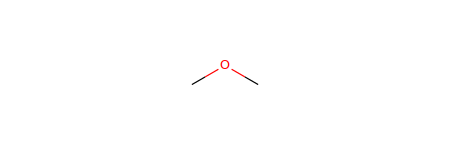

In [2]:
smiles = "COC"
mol = Chem.MolFromSmiles("COC")
mol

Here there are no hydrogens (as expected from the SMILES)

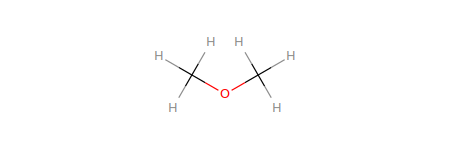

In [3]:
mol = Chem.AddHs(mol)
mol

Here rdkit manages to add Hs to all of the carbons as expected

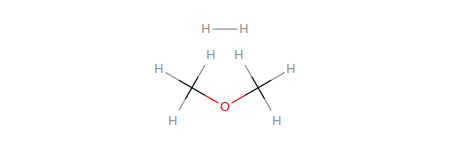

In [4]:
rwmol = Chem.RWMol(mol)
bonds = rwmol.GetBonds()
b = rwmol.GetBondWithIdx(2)
a1 = b.GetBeginAtom()
a2 = b.GetEndAtom()
rwmol.RemoveBond(a1.GetIdx(), a2.GetIdx())
a1.SetNumExplicitHs(a1.GetNumExplicitHs() + 1)
a2.SetNumExplicitHs(a2.GetNumExplicitHs() + 1)
rwmol = Chem.AddHs(rwmol, explicitOnly=True)
rwmol

After fragmentation, both fragments are unsaturated. I would like to quench them with hydrogen.

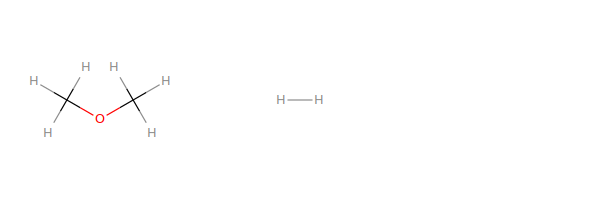

In [5]:
frags = Chem.GetMolFrags(rwmol, asMols=True, sanitizeFrags=True)
MolsToGridImage(frags)